<a href="https://colab.research.google.com/github/threegenie/studying_pytorch/blob/main/03_%EC%84%A0%ED%98%95%ED%9A%8C%EA%B7%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

> PyTorch로 시작하는 딥러닝 입문 - <nn.Module로 구현하는 선형 회귀>를 참고하여 직접 linear regression model을 만들어보기(sklearn과 pytorch 비교)
- Kaggle House Prices 데이터를 사용하여 집값예측
(https://www.kaggle.com/c/house-prices-advanced-regression-techniques/overview)

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.autograd import Variable
import pandas as pd
import numpy as np
import os, sys
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# random seed 고정
torch.manual_seed(1)

### Data import

In [3]:
df = pd.read_csv('https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/house-prices/house_prices_train.csv')
df_t = pd.read_csv('https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/house-prices/house_prices_test.csv')

In [4]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
df_t.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


### Scikit-Learn으로 Simple Linear Regression 모델 만들기

In [6]:
from sklearn.linear_model import LinearRegression

In [7]:
# linear model create
model = LinearRegression()

In [8]:
# 예측에 사용할 특성 분리
feature = ['GrLivArea'] #지상생활면적
target = ['SalePrice'] #주택판매가격(달러)
X_train = df[feature]
y_train = df[target]

In [9]:
# model fit
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [10]:
# 테스트 데이터를 통해 예측
X_test = [[x] for x in df_t['GrLivArea']]
y_pred = model.predict(X_test)

In [11]:
#전체 예측값
y_pred

array([[114557.82748987],
       [160945.27292207],
       [193084.38061182],
       ...,
       [149696.58523066],
       [122485.47405334],
       [232829.74378814]])

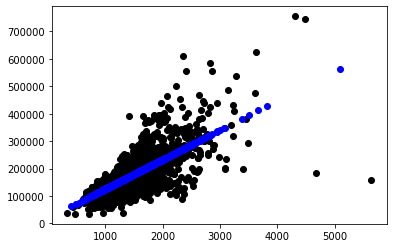

In [12]:
## train 데이터에 대한 그래프
plt.scatter(X_train, y_train, color='black', linewidth=1)

## test 데이터에 대한 예측을 파란색 점으로 나타내기
plt.scatter(X_test, y_pred, color='blue', linewidth=1)

### Pytorch로 Simple Linear Regression 모델 만들기
- https://github.com/Benuraj/Linear-Regression 참고

In [13]:
# 예측에 사용할 특성 분리
space = df['GrLivArea']
price = df['SalePrice']

In [14]:
# pandas -> numpy - float
x_train = np.array(space).reshape(-1, 1).astype('float32')
y_train = np.array(price).reshape(-1,1).astype('float32')

In [15]:
# linear regression model built
class LinearRegressionModel(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(LinearRegressionModel, self).__init__()
        self.linear = nn.Linear(input_dim, output_dim)
    
    def forward(self, x):
        out = self.linear(x)
        return out

In [16]:
# Linear regression model, Loss and optimizer
model = LinearRegressionModel(1, 1)
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr = 0.00000001)  

# Train the model
num_epochs = 600
for epoch in range(num_epochs):
    # Convert numpy arrays to torch tensors
    inputs = Variable(torch.from_numpy(x_train))
    labels = Variable(torch.from_numpy(y_train))

    # Clearing the gradients w.r.t. parameters
    optimizer.zero_grad()

    # Forward pass
    # model = model.double() # torch complains that tensor type mismatch if not included
    outputs = model.forward(inputs)
    loss = criterion(outputs, labels)
    
    # Backward and optimize
    loss.backward() # Backpropagation
    optimizer.step() # Update of parameters
    
    if (epoch+1) % 5 == 0:
        print ('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, loss.item()))


Epoch [5/600], Loss: 26474874880.0000
Epoch [10/600], Loss: 16914568192.0000
Epoch [15/600], Loss: 11277314048.0000
Epoch [20/600], Loss: 7953293312.0000
Epoch [25/600], Loss: 5993281536.0000
Epoch [30/600], Loss: 4837555200.0000
Epoch [35/600], Loss: 4156079360.0000
Epoch [40/600], Loss: 3754247424.0000
Epoch [45/600], Loss: 3517305344.0000
Epoch [50/600], Loss: 3377591552.0000
Epoch [55/600], Loss: 3295209984.0000
Epoch [60/600], Loss: 3246632704.0000
Epoch [65/600], Loss: 3217989376.0000
Epoch [70/600], Loss: 3201099264.0000
Epoch [75/600], Loss: 3191140352.0000
Epoch [80/600], Loss: 3185268224.0000
Epoch [85/600], Loss: 3181805568.0000
Epoch [90/600], Loss: 3179763712.0000
Epoch [95/600], Loss: 3178560000.0000
Epoch [100/600], Loss: 3177849856.0000
Epoch [105/600], Loss: 3177431296.0000
Epoch [110/600], Loss: 3177184512.0000
Epoch [115/600], Loss: 3177038848.0000
Epoch [120/600], Loss: 3176952832.0000
Epoch [125/600], Loss: 3176902400.0000
Epoch [130/600], Loss: 3176872448.0000
Epo

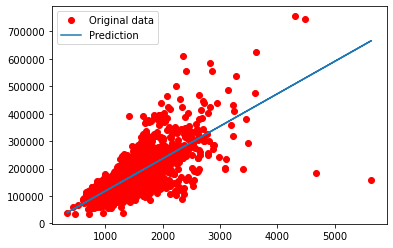

In [17]:
# Plot the graph
predicted = model.forward(torch.from_numpy(x_train)).detach().numpy()
plt.plot(x_train, y_train, 'ro', label='Original data')
plt.plot(x_train, predicted, label='Prediction')
plt.legend()
plt.show()

### Pytorch로 Simple Linear Regression 모델 만들기 
(교재 예시대로 했지만 실패...)

In [18]:
# # 예측에 사용할 특성 분리
# feature = ['GrLivArea'] #지상생활면적
# target = ['SalePrice'] #주택판매가격(달러)
# X_train = df[feature]
# y_train = df[target]

In [19]:
# # convert pandas dataframe to numpy array
# trainX = X_train.values
# trainY = y_train.values

In [20]:
# # numpy array to Torch tensor
# X_train_ts = torch.from_numpy(trainX)
# y_train_ts = torch.from_numpy(trainY)

In [21]:
# # long tensor to float tensor
# X_train_ts = X_train_ts.float()
# y_train_ts = y_train_ts.float()

In [22]:
# # linear model create
# model = nn.Linear(1,1) #단순 선형 회귀이므로 imput_dim = 1, output_dim = 1

In [23]:
# # optimizer 설정
# optimizer = torch.optim.SGD(model.parameters(), lr=1e-4) 

In [24]:
# # loss 설정
# criterion = torch.nn.MSELoss(reduction='sum')

In [25]:
# num_epochs = 600
# for epoch in range(num_epochs):
#     # Convert numpy arrays to torch tensors
#     inputs = Variable(torch.from_numpy(x_train))
#     labels = Variable(torch.from_numpy(y_train))

#     # Clearing the gradients w.r.t. parameters
#     optimizer.zero_grad()

#     # Forward pass
#     # model = model.double() # torch complains that tensor type mismatch if not included
#     outputs = model.forward(inputs)
#     loss = criterion(outputs, labels)
    
#     # Backward and optimize
#     loss.backward() # Backpropagation
#     optimizer.step() # Update of parameters
    
#     if (epoch+1) % 5 == 0:
#         print ('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, loss.item()))